In [1]:
import geopandas as gpd

path = '../data/perimeter/Global_fire_atlas_V1_perimeter_2003'
gdf = gpd.read_file(path)
gdf.head()

,fire_ID,lat,lon,size,perimeter,start_date,start_DOY,end_date,end_DOY,duration,expansion,fire_line,speed,direction,direction_s,landcover,landcover_s,tile_ID,geometry
0,1,21.5312,-158.212,6.43,12.04,2003-07-20,201,2003-07-30,211,11,0.58,1.22,0.91,8,northwest,12,Croplands,h03v06,"POLYGON ((-158.23158 21.54583, -158.21366 21.5..."
1,2,20.6521,-156.258,0.21,1.85,2003-06-27,178,2003-06-27,178,1,0.21,0.46,0.46,0,none,10,Grasslands,h03v06,"POLYGON ((-156.26450 20.65417, -156.26005 20.6..."
2,3,20.6396,-156.245,9.00,16.67,2003-07-08,189,2003-07-13,194,6,1.50,2.08,1.68,4,southeast,7,Open shrublands,h03v06,"POLYGON ((-156.26929 20.64583, -156.26484 20.6..."
3,4,20.5396,-156.668,1.50,7.41,2003-05-02,122,2003-05-11,131,10,0.15,0.32,0.86,4,southeast,7,Open shrublands,h03v06,"POLYGON ((-156.67428 20.54167, -156.66983 20.5..."
4,5,19.4229,-155.420,6.22,12.96,2003-02-25,56,2003-03-01,60,5,1.24,2.41,1.08,8,northwest,7,Open shrublands,h03v07,"POLYGON ((-155.42910 19.44167, -155.42468 19.4..."


In [2]:
## running EDA on the gdf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Number of rows:", gdf.shape[0])
print("Number of columns:", gdf.shape[1])


Number of rows: 989861
Number of columns: 19


In [4]:
print(gdf.dtypes)

fire_ID           int64
lat             float64
lon             float64
size            float64
perimeter       float64
start_date       object
start_DOY         int64
end_date         object
end_DOY           int64
duration          int64
expansion       float64
fire_line       float64
speed           float64
direction         int64
direction_s      object
landcover         int64
landcover_s      object
tile_ID          object
geometry       geometry
dtype: object


In [5]:
print(gdf.isnull().sum())

fire_ID        0
lat            0
lon            0
size           0
perimeter      0
start_date     0
start_DOY      0
end_date       0
end_DOY        0
duration       0
expansion      0
fire_line      0
speed          0
direction      0
direction_s    0
landcover      0
landcover_s    0
tile_ID        0
geometry       0
dtype: int64


In [6]:
print(gdf.duplicated().sum())

0


In [7]:
print(gdf.describe())

             fire_ID            lat            lon           size  \
count  989861.000000  989861.000000  989861.000000  989861.000000   
mean   494918.103110       2.440978      17.176185       4.330940   
std    285738.905089      20.917087      53.050861      28.677773   
min         1.000000     -49.868800    -179.950000       0.210000   
25%    247463.000000     -12.585400      -6.941900       0.210000   
50%    494922.000000      -2.335400      22.285500       0.860000   
75%    742375.000000      10.952100      35.336800       2.570000   
max    989832.000000      69.997900     179.982100    7149.850000   

           perimeter      start_DOY        end_DOY       duration  \
count  989861.000000  989861.000000  989861.000000  989861.000000   
mean        8.486279     189.045638     190.215555       4.554550   
std        15.721451     101.739270     102.135824       4.918231   
min         1.850000       1.000000       1.000000       1.000000   
25%         1.850000     105.0000

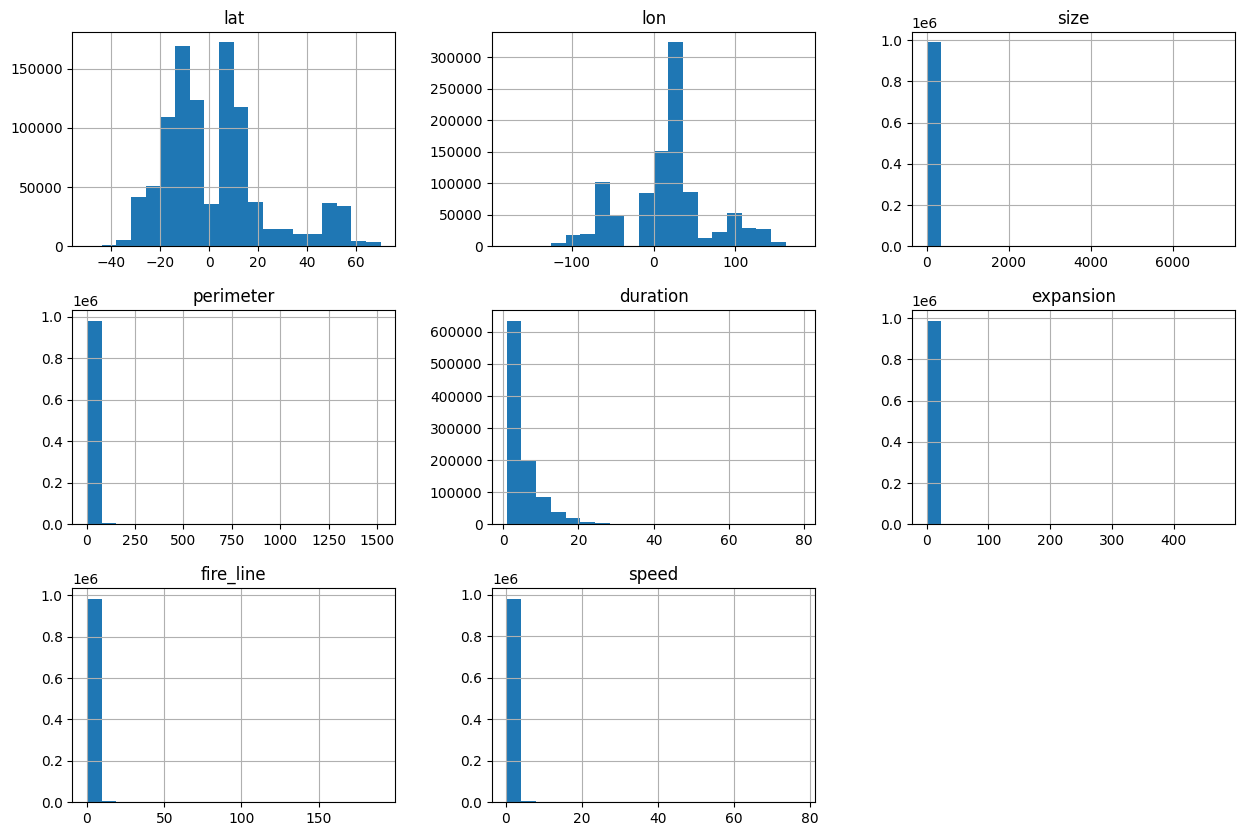

In [8]:
import matplotlib.pyplot as plt

num_cols = ['lat', 'lon', 'size', 'perimeter', 'duration', 'expansion', 'fire_line', 'speed']
gdf[num_cols].hist(bins=20, figsize=(15,10))
plt.show()

## Num Cols and Outlier pin pointing

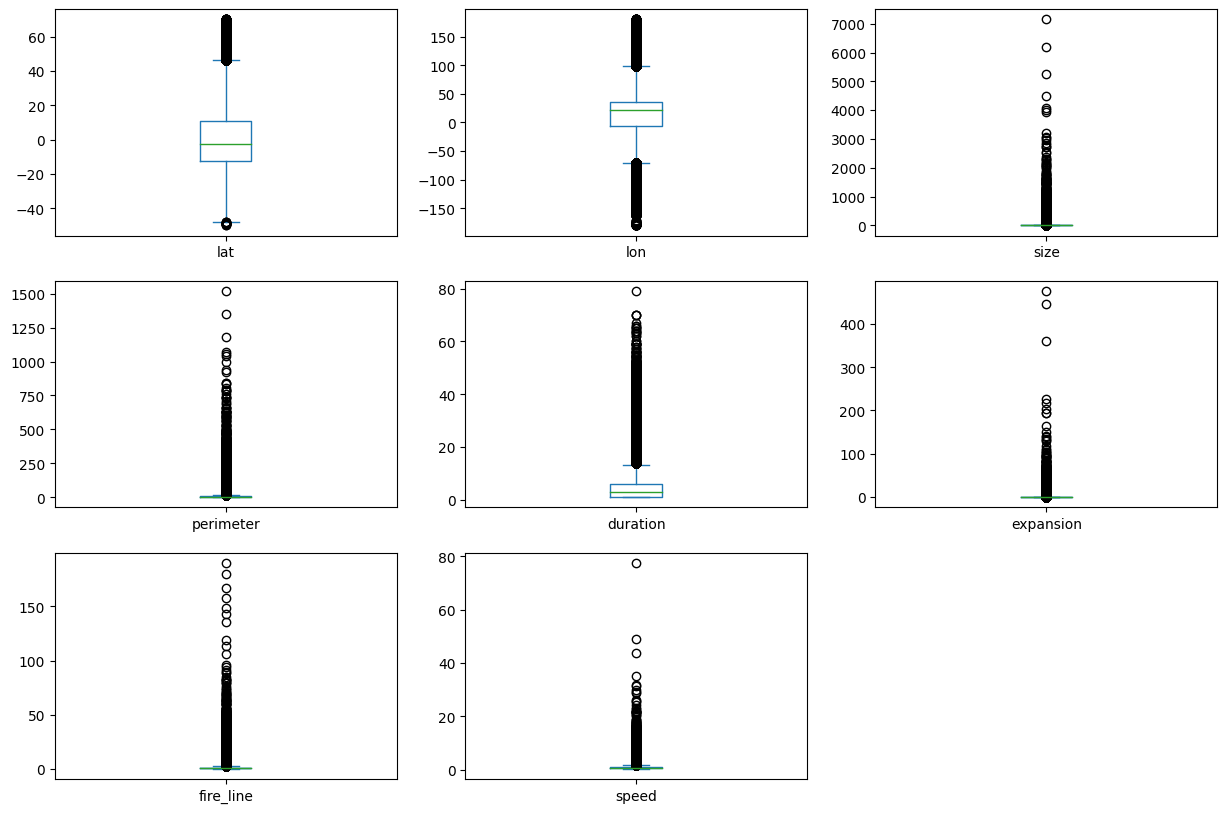

In [9]:
gdf[num_cols].plot(kind='box', subplots=True, layout=(3,3), figsize=(15,10))
plt.show()

## Landcover and Landcover_s

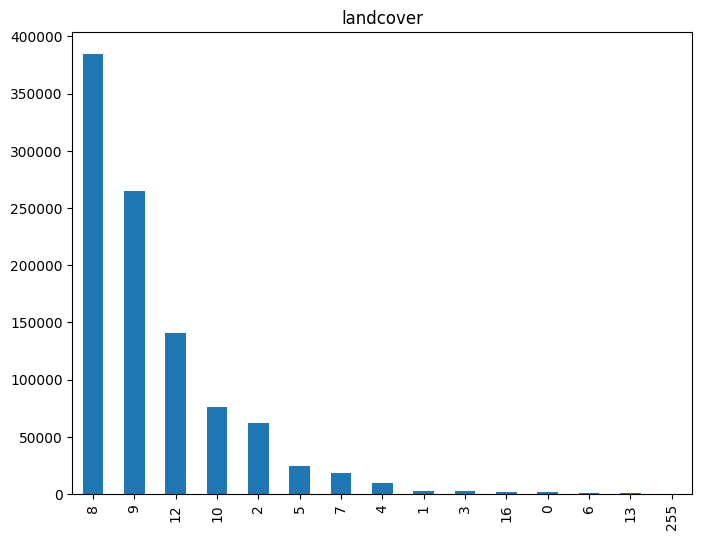

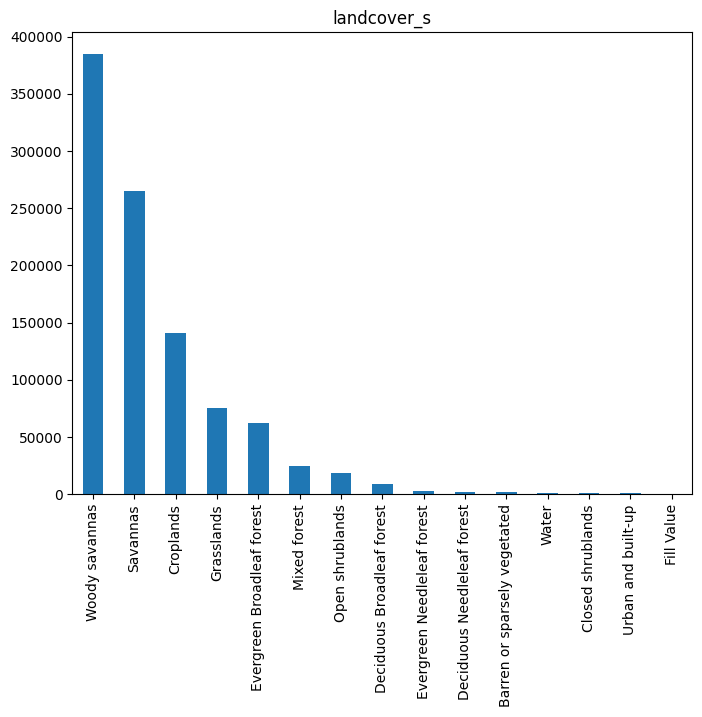

In [10]:
cat_cols = ['landcover', 'landcover_s']

for col in cat_cols:
    gdf[col].value_counts().plot(kind='bar', figsize=(8,6))
    plt.title(col)
    plt.show()

## Longitude and Latitude

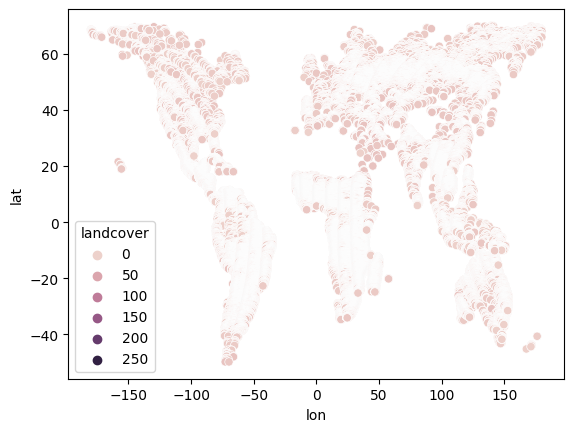

In [12]:
import seaborn as sns

sns.scatterplot(x='lon', y='lat', data=gdf, hue='landcover')
plt.show()

## Correlation Matrix

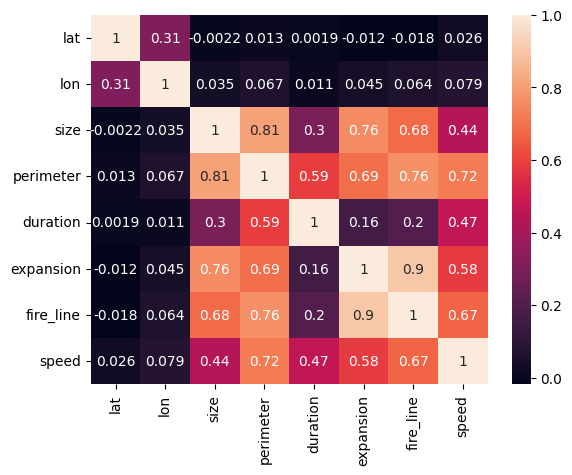

In [13]:
corr_matrix = gdf[num_cols].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Monthly Frequency of fires, Seems like a Pattern

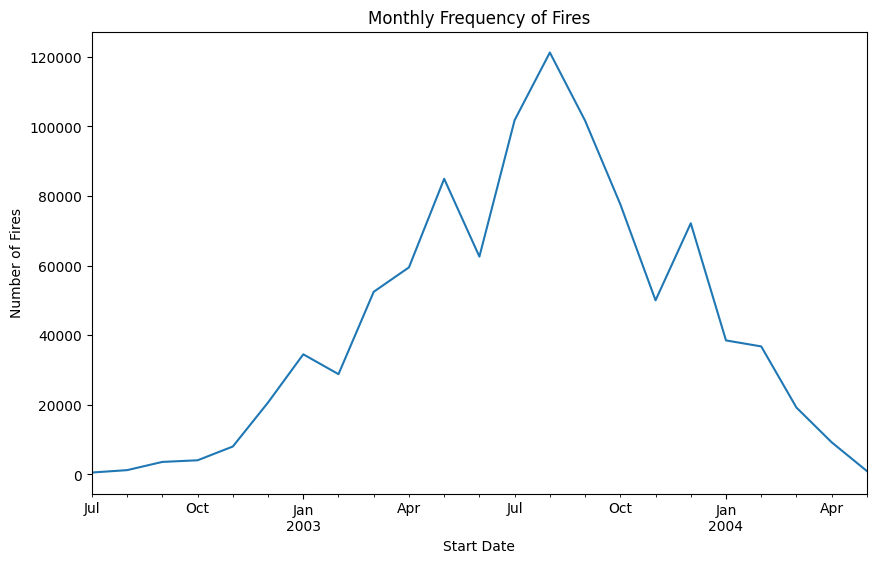

In [15]:
import matplotlib.dates as mdates

gdf['start_date'] = pd.to_datetime(gdf['start_date'])
gdf.set_index('start_date', inplace=True)
gdf.resample('M').size().plot(legend=False, figsize=(10,6))
plt.title('Monthly Frequency of Fires')
plt.xlabel('Start Date')
plt.ylabel('Number of Fires')
plt.show()

## To see if duration has some effect on the size of wildfire

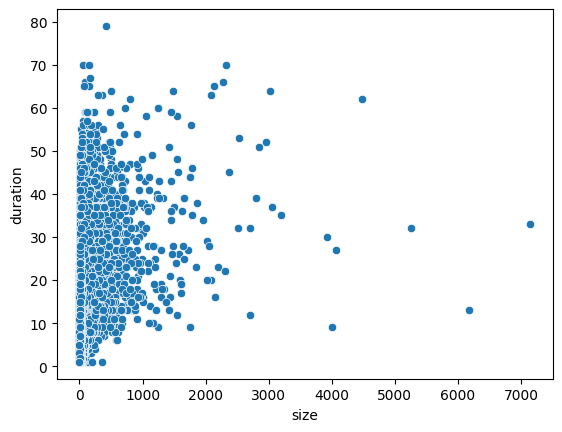

In [16]:
sns.scatterplot(x='size', y='duration', data = gdf)
plt.show()

## Landcover VS Size, BOXPLOT

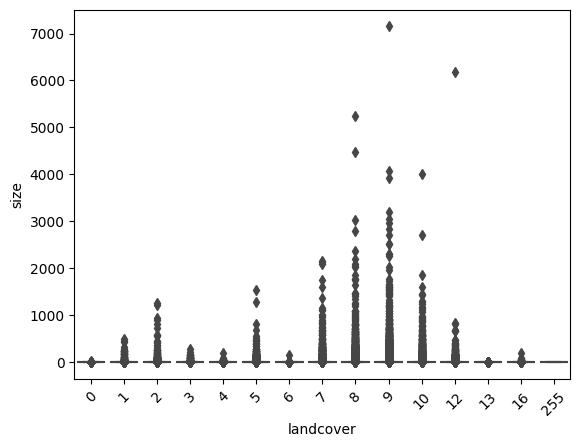

In [17]:
sns.boxplot(x='landcover', y='size', data=gdf)
plt.xticks(rotation=45)
plt.show()

In [19]:
!pip3 install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 3.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip


## Trying something out

In [20]:
import folium
from folium.plugins import HeatMap

fire_map = folium.Map(location=[gdf['lat'].mean(), gdf['lon'].mean()], zoom_start=6)

heat_data = [[row['lat'],row['lon']] for index, row in gdf.iterrows()]

HeatMap(heat_data).add_to(fire_map)

fire_map.save('fire_heatmap.html')

## Relationship between Landcover and fire size

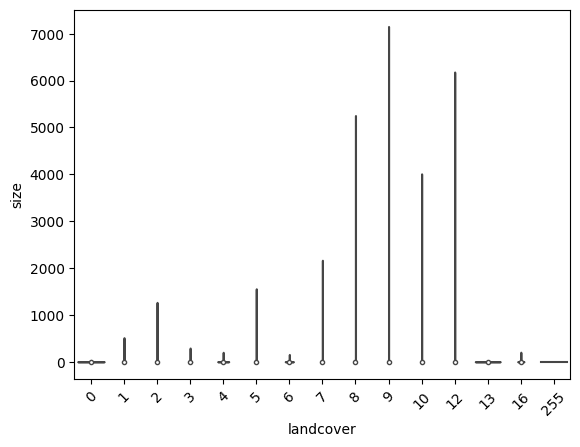

In [21]:
sns.violinplot(x='landcover', y='size', data=gdf)
plt.xticks(rotation=45)
plt.show()